# RGB well logs

Before I learned to code, as a Landmark consultant, I once wanted to make RGB blended displays for well logs. All I know was Landmark tools, especially PowerView. So my workflow was:

- Export logs from StratWorks.
- Reformat the files with awk.
- Load them as seismic horizons.
- Make the blended displays.
- Make them really huge and capture screen shots as TIFFs.
- Note the depth ranges and load back into StratWorks.

This took about an hour.

---

Obviously, it's much faster with Python...

In [1]:
import welly

In [2]:
# To load from web.
url = "https://s3.amazonaws.com/agilegeo/geocomp/2090867.las"
w = welly.Well.from_las(url)

In [5]:
# To load from local file.
w = welly.Well.from_las('../data/2090867.las')

In [6]:
w

Well(uwi: '5083067080000', 16 curves: ['GR', 'TENS', 'GRTO', 'GRTC', 'POTA', 'URAN', 'THOR', 'TURT', 'UKRT', 'TKRT', 'ERPO', 'ERUR', 'ERTH', 'ERTO', 'ERTC', 'AMCR'])

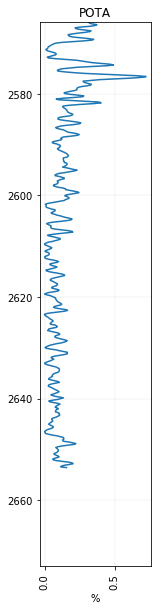

In [7]:
w.data['POTA'].plot()

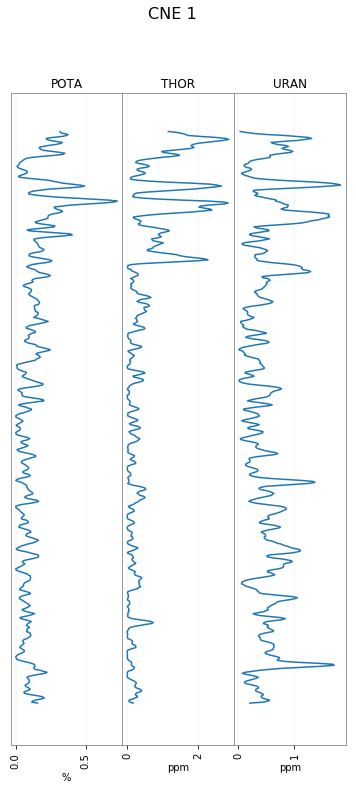

In [24]:
logs = ['POTA', 'THOR', 'URAN']

w.plot(tracks=logs, extents=(2560,2660))

## Normalize the data and form an array

First, do a min-max normaliztion:

In [25]:
def normalize(curve):
    return (curve - np.nanmin(curve)) / (np.nanmax(curve) - np.nanmin(curve))

Now combine the data into an array:

In [36]:
import numpy as np

data = np.array([normalize(w.data[log]) for log in logs]).T

Now reshape the array to look like an RGB image.

In [38]:
img = data.reshape(-1, 1, 3)

img.shape

(703, 1, 3)

## Make the plot

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt

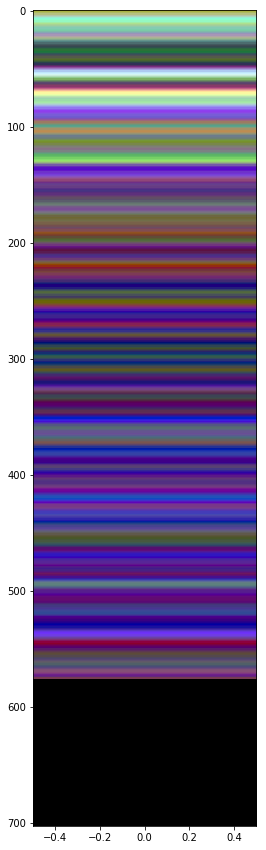

In [43]:
plt.figure(figsize=(4, 15))
plt.imshow(np.sqrt(img), aspect='auto')

Plot with the 1D logs as well:

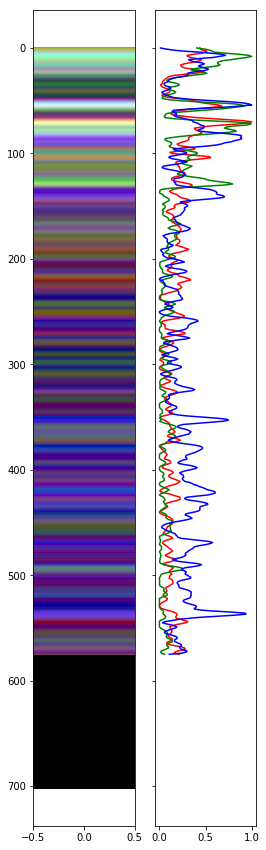

In [49]:
fig, axs = plt.subplots(ncols=2, figsize=(4, 15), sharey=True)
axs[0].imshow(np.sqrt(img), aspect='auto')
axs[1].plot(data[:,0], np.arange(data.shape[0]), 'r')
axs[1].plot(data[:,1], np.arange(data.shape[0]), 'g')
axs[1].plot(data[:,2], np.arange(data.shape[0]), 'b')